In [1]:
from _element import feature_control as ft_c

In [2]:
from _usecase import algorithm_prophet as prpt

In [3]:
import pandas as pd

In [4]:
from datetime import datetime

In [5]:
from _element import varr

In [6]:
varr.DF_DIR

'\\_element\\data\\private\\'

In [7]:
varr.PJ_DIR

'C:\\Studying\\Project_Nextop\\nextop-engine\\nextop_engine'

In [8]:
df_raw= ft_c.xlsx_opener(varr.PJ_DIR+varr.DF_DIR, 'KPP일별투입(10_17)_withobject.xlsx')

In [11]:
df_temp= ft_c.xlsx_opener(varr.PJ_DIR+varr.TEMP_DATA_DIR, 'temp_data_merged.xlsx')

In [13]:
y_col= df_raw.columns.values.tolist()

In [14]:
try:
    y_col.remove['ds']
except Valueerror:
    pass

In [15]:
y_col

[1041, 1692, 1815, 1853, 1878]

In [16]:
x_col= df_temp.columns.values.tolist()

In [17]:
x_col

['ds', 'temp_max', 'temp_min', 'rain_amount']

In [18]:
df_raw['ds']= pd.to_datetime(df_raw['ds'], box=True, format= '%Y/%m/%d', exact=True)

In [19]:
df_temp['ds']= pd.to_datetime(df_temp['ds'], box=True, format= '%Y/%m/%d', exact=True)

In [20]:
df_raw= pd.merge(df_raw, df_temp, how='inner', on='ds')

In [22]:
result_dict= {}
for y in y_col:
    result_dict[y]= prpt.Bayseian2(df_raw, varr.FORECASTDAY, y, x_col, 'day')

INFO:fbprophet.forecaster:Found custom seasonality named "weekly", disabling built-in weekly seasonality.
INFO:fbprophet.forecaster:Found custom seasonality named "weekly", disabling built-in weekly seasonality.
INFO:fbprophet.forecaster:Found custom seasonality named "weekly", disabling built-in weekly seasonality.
INFO:fbprophet.forecaster:Found custom seasonality named "weekly", disabling built-in weekly seasonality.
INFO:fbprophet.forecaster:Found custom seasonality named "weekly", disabling built-in weekly seasonality.


In [24]:
result_dict[1041]['model']

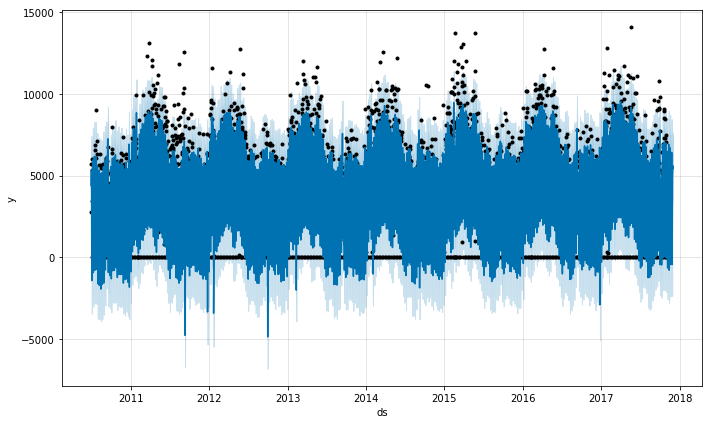

In [25]:
result_dict[1041]['model'].plot(result_dict[1041]['forecastProphetTable'])

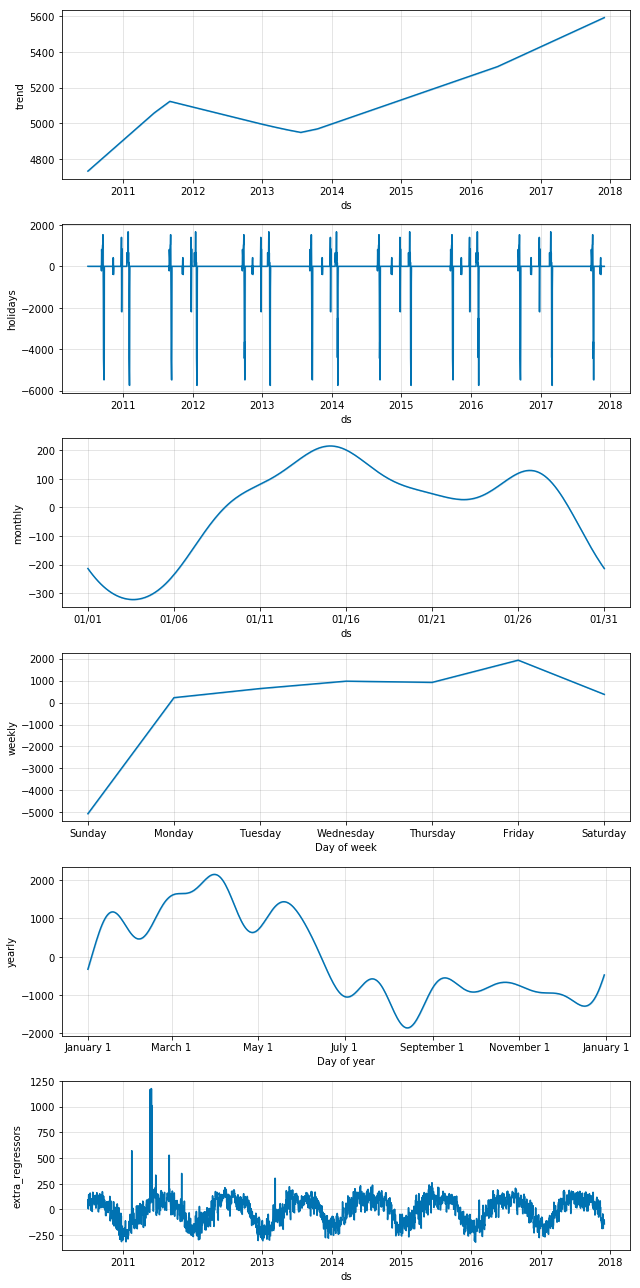

In [26]:
result_dict[1041]['model'].plot_components(result_dict[1041]['forecastProphetTable'])

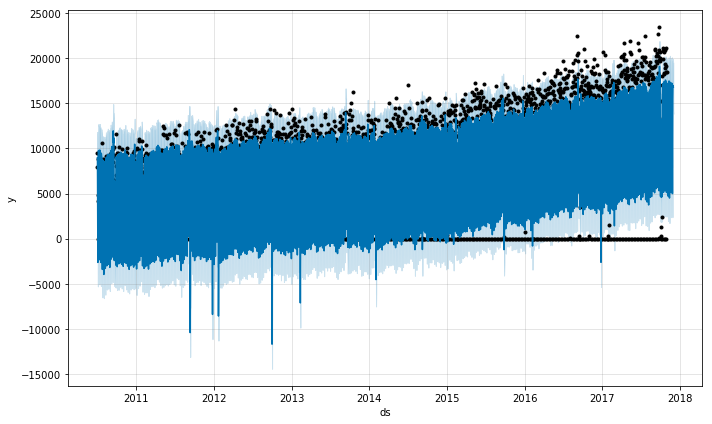

In [27]:
result_dict[1692]['model'].plot(result_dict[1692]['forecastProphetTable'])

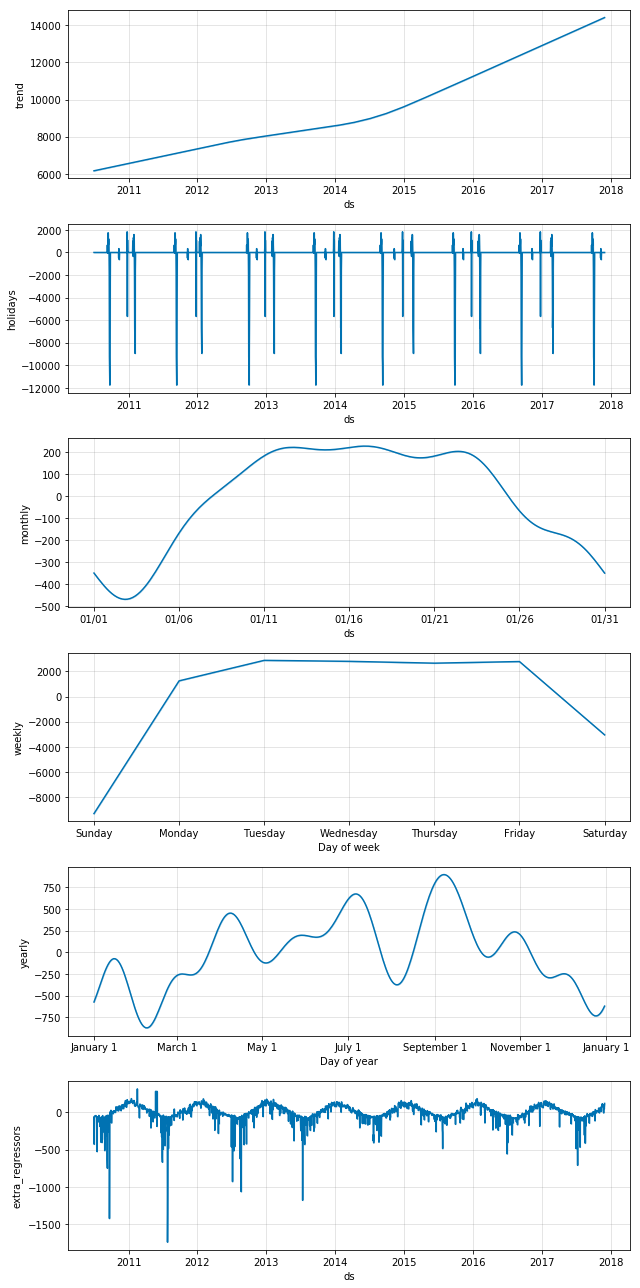

In [28]:
result_dict[1692]['model'].plot_components(result_dict[1692]['forecastProphetTable'])

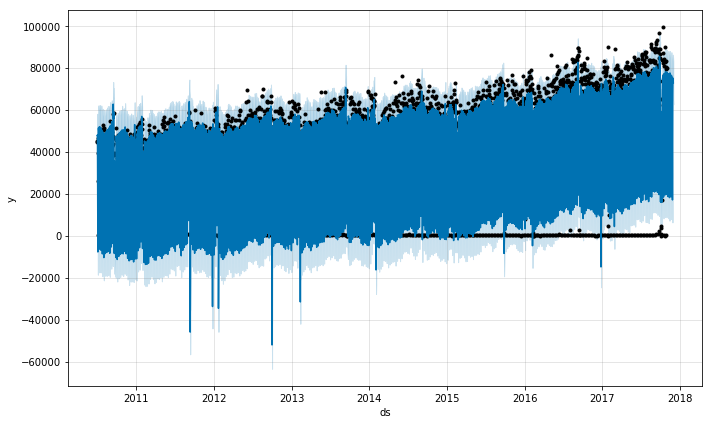

In [29]:
result_dict[1815]['model'].plot(result_dict[1815]['forecastProphetTable'])

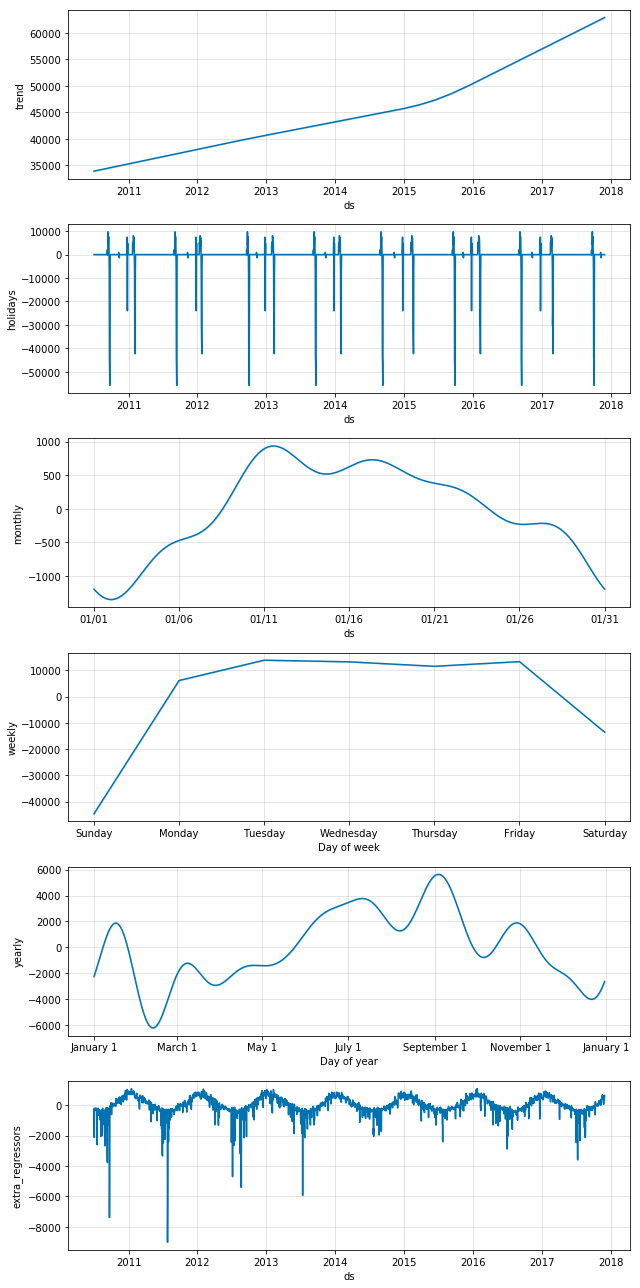

In [30]:
result_dict[1815]['model'].plot_components(result_dict[1815]['forecastProphetTable'])

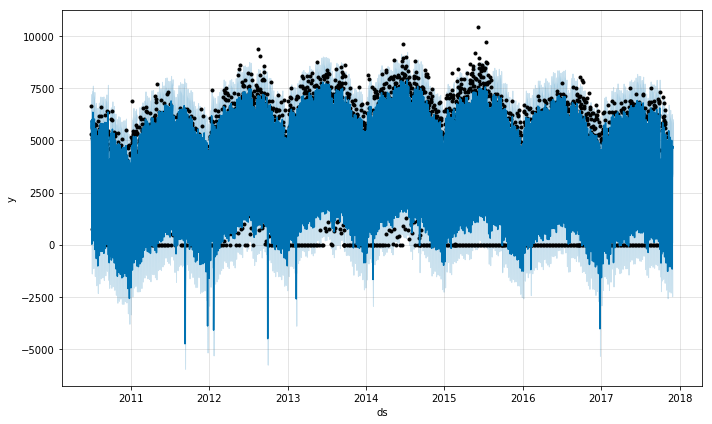

In [31]:
result_dict[1853]['model'].plot(result_dict[1853]['forecastProphetTable'])

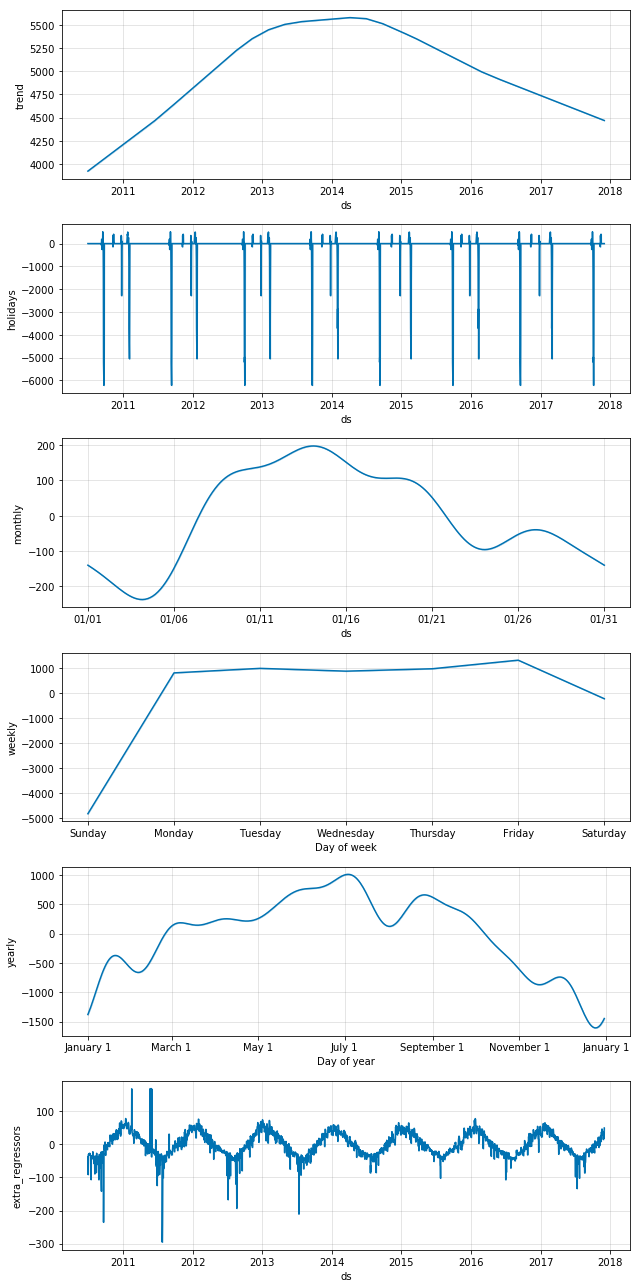

In [32]:
result_dict[1853]['model'].plot_components(result_dict[1853]['forecastProphetTable'])

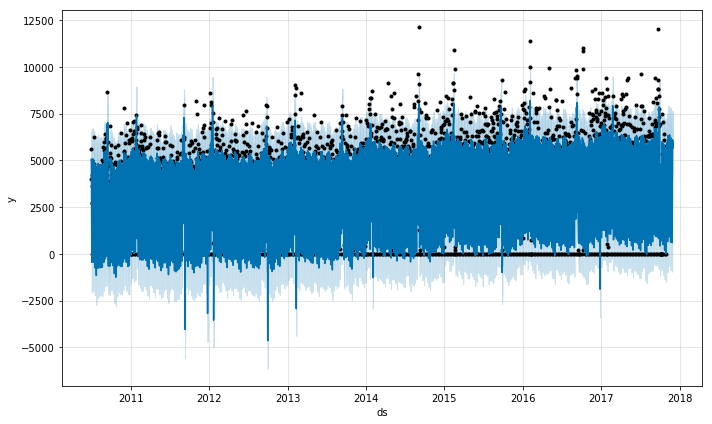

In [33]:
result_dict[1878]['model'].plot(result_dict[1878]['forecastProphetTable'])

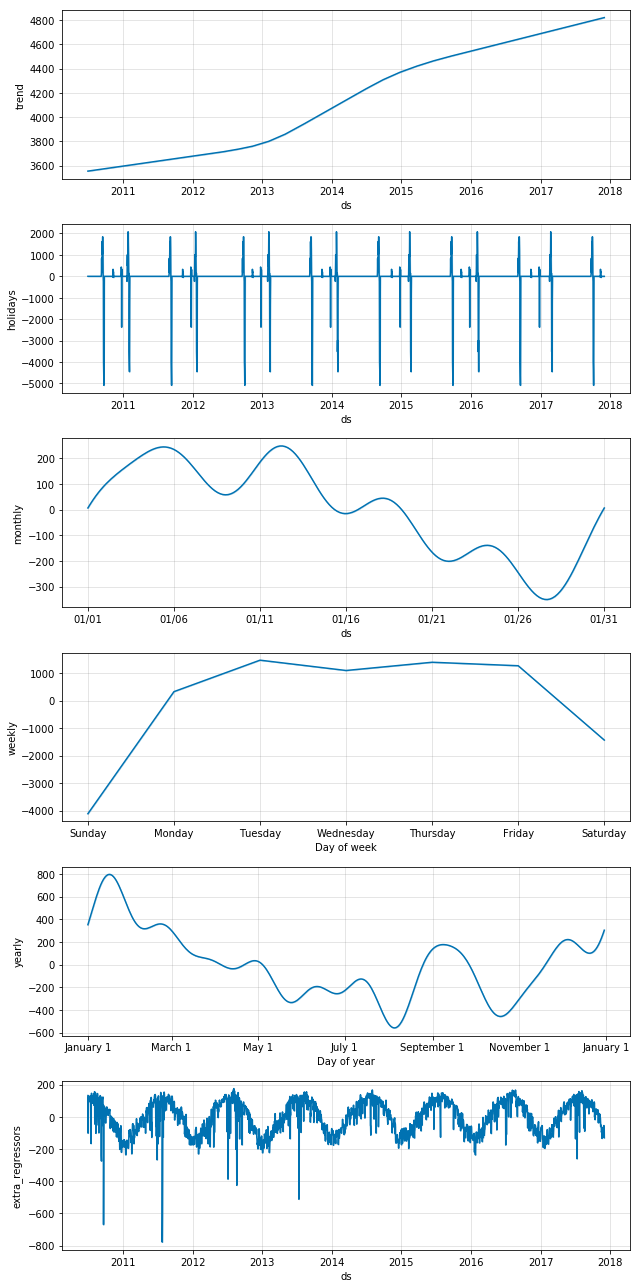

In [34]:
result_dict[1878]['model'].plot_components(result_dict[1878]['forecastProphetTable'])